In [1]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
import nltk

In [2]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thesw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable

# Retrieve the News API key
news_api = os.getenv("news_api")

In [4]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=news_api)

In [5]:
# Fetch the Bitcoin news articles

bitcoin_en = newsapi.get_everything(
    q="Bitcoin", language="en", page_size=100
)

# Show the total number of news
bitcoin_en["totalResults"]

4299

In [6]:
# Fetch the Ethereum news articles

ethereum_en = newsapi.get_everything(
    q="Ethereum", language="en", page_size=100
)

# Show the total number of news
ethereum_en["totalResults"]

918

In [7]:
# Create the Bitcoin sentiment scores DataFrame

# Define a function to get the sentiment scores
def get_sentiment_scores(text):
    sentiment_scores = {}

    # Sentiment scoring with VADER
    text_sentiment = analyzer.polarity_scores(text)

    sentiment_scores["text"] = text
  
    sentiment_scores["Compound"] = text_sentiment["compound"]
    sentiment_scores["Positive"] = text_sentiment["pos"]
    sentiment_scores["Neutral"] = text_sentiment["neu"]
    sentiment_scores["Negative"] = text_sentiment["neg"]


    return sentiment_scores


In [8]:
# Empty list to store the DataFrame structure
sentiments_data = []

# Loop through all the news articles
for article in bitcoin_en["articles"]:
    try:
        # Get sentiment scoring using the get_sentiment_score() function
        sentiments_data.append(
            get_sentiment_scores(
                article["content"],
                
            )
        )

    except AttributeError:
        pass

# Create a DataFrame with the news articles' data and their sentiment scoring results
bitcoin_en_df = pd.DataFrame(sentiments_data)

bitcoin_en_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...


In [10]:
# Create the ethereum sentiment scores DataFrame

# Empty list to store the DataFrame structure
sentiments2_data = []

# Loop through all the news articles
for article in ethereum_en["articles"]:
    try:
        # Get sentiment scoring using the get_sentiment_score() function
        sentiments2_data.append(
            get_sentiment_scores(
                article["content"],
                
            )
        )

    except AttributeError:
        pass

# Create a DataFrame with the news articles' data and their sentiment scoring results
ethereum_en_df = pd.DataFrame(sentiments2_data)

ethereum_en_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...


In [15]:
# Describe the Bitcoin Sentiment

bitcoin_en_df.describe()

,Compound,Negative,Neutral,Positive
count,98.000000,98.000000,98.000000,98.000000
mean,0.144200,0.039398,0.900061,0.060561
std,0.437824,0.054791,0.075762,0.053277
min,-0.831600,0.000000,0.640000,0.000000
25%,-0.096325,0.000000,0.857750,0.000000
50%,0.175200,0.000000,0.927000,0.065500
75%,0.507000,0.067500,0.946500,0.085250
max,0.914100,0.271000,1.000000,0.249000


In [13]:
# Describe the Ethereum Sentiment

ethereum_en_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.178518,0.026906,0.916385,0.056698
std,0.410332,0.048792,0.072458,0.055863
min,-0.877900,0.000000,0.551000,0.000000
25%,0.000000,0.000000,0.889500,0.000000
50%,0.250000,0.000000,0.930000,0.057000
75%,0.502100,0.045250,0.958000,0.098500
max,0.822100,0.287000,1.000000,0.239000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score of 0.0605 compared to 0.056 from Ethereum

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score of 0.25 compared to 0.17 from Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score of 0.065 compared to 0.057 from Ethereum.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Expand the default stopwords list if necessary

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
lemmatizer = WordNetLemmatizer()

# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens
    
    

In [22]:
# Create a new tokens column for bitcoin

bitcoin_en_df["tokens"] = bitcoin_en_df["text"].apply(tokenizer)
bitcoin_en_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"[less, two, mile, icelands, reykjavik, airport..."
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [23]:
# Create a new tokens column for ethereum

ethereum_en_df["tokens"] = ethereum_en_df["text"].apply(tokenizer)
ethereum_en_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent..."
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi..."
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...,"[blockchain, ha, picking, pace, since, incepti..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [28]:
from collections import Counter
from nltk import ngrams

In [33]:
# Generate the Bitcoin N-grams where N=2

bitcoin_tokens = [item for items in bitcoin_en_df.tokens.to_list() for item in items ]
bigram_count_bitcoin = Counter(ngrams(bitcoin_tokens, n=2))
bigram_count_bitcoin.most_common(20)

[(('satoshi', 'nakaboto'), 38),
 (('bitcoin', 'btc'), 25),
 (('char', 'robot'), 19),
 (('robot', 'colleague'), 19),
 (('colleague', 'satoshi'), 19),
 (('nakaboto', 'writes'), 19),
 (('writes', 'bitcoin'), 19),
 (('every', 'fucking'), 19),
 (('fucking', 'daywelcome'), 19),
 (('daywelcome', 'another'), 19),
 (('another', 'edition'), 19),
 (('edition', 'bitcoin'), 19),
 (('bitcoin', 'today'), 19),
 (('today', 'satoshi'), 19),
 (('nakaboto', 'tell'), 19),
 (('tell', 'whats'), 19),
 (('whats', 'going'), 19),
 (('going', 'bitcoin'), 19),
 (('bitcoin', 'past'), 19),
 (('past', 'hour'), 19)]

In [34]:
# Generate the Ethereum N-grams where N=2

ethereum_tokens = [item for items in ethereum_en_df.tokens.to_list() for item in items ]
bigram_count_ethereum = Counter(ngrams(ethereum_tokens, n=2))
bigram_count_ethereum.most_common(20)

[(('early', 'morning'), 11),
 (('char', 'ethereumethereum'), 10),
 (('ethereum', 'ended'), 10),
 (('saw', 'ethereum'), 9),
 (('morning', 'intraday'), 9),
 (('ended', 'day'), 9),
 (('start', 'day'), 8),
 (('day', 'saw'), 8),
 (('char', 'bitcoin'), 7),
 (('intraday', 'high'), 7),
 (('price', 'action'), 5),
 (('ethereumethereum', 'fell'), 5),
 (('high', 'hitting'), 5),
 (('ethereum', 'cofounder'), 5),
 (('char', 'ethereum'), 5),
 (('complete', 'blockchain'), 4),
 (('ethereum', 'programmer'), 4),
 (('programmer', 'bundle'), 4),
 (('digital', 'currency'), 4),
 (('bitcoin', 'ethereum'), 4)]

In [35]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [37]:
# Get the top 10 words for Bitcoin

token_count(bitcoin_tokens)

[('bitcoin', 99),
 ('char', 97),
 ('satoshi', 41),
 ('nakaboto', 38),
 ('cryptocurrency', 30),
 ('ha', 29),
 ('btc', 27),
 ('past', 22),
 ('say', 22),
 ('another', 21)]

In [38]:
# Get the top 10 words for Ethereum

token_count(ethereum_tokens)

[('char', 96),
 ('ethereum', 69),
 ('ha', 31),
 ('bitcoin', 27),
 ('blockchain', 26),
 ('day', 25),
 ('cryptocurrency', 20),
 ('morning', 16),
 ('week', 14),
 ('price', 14)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

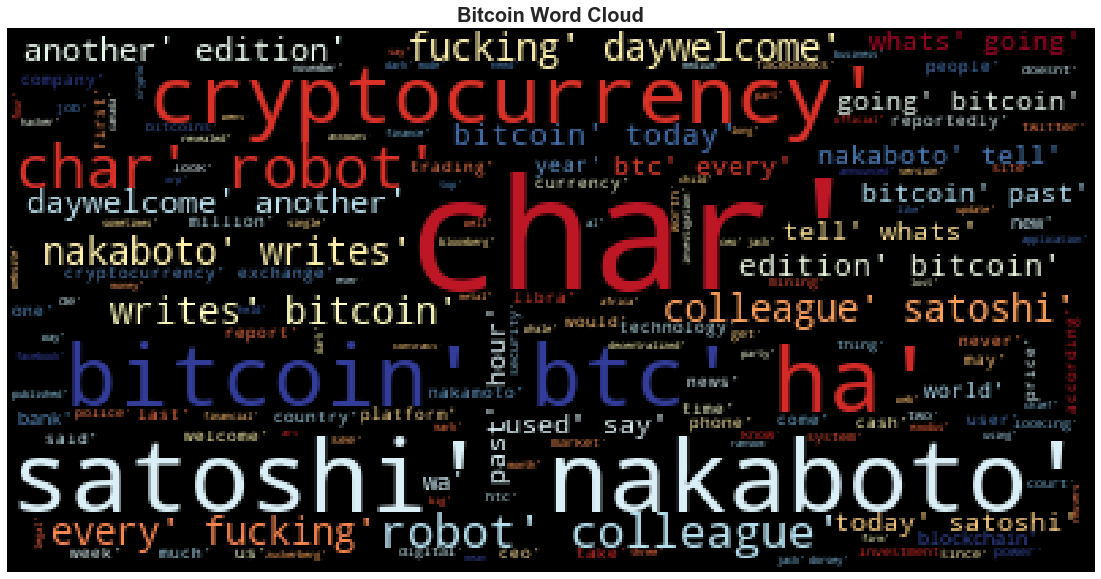

In [53]:
# Generate the Bitcoin word cloud



big_string_bitcoin=str(bitcoin_en_df["tokens"].tolist())


wordcloud = WordCloud(colormap="RdYlBu").generate(big_string_bitcoin)
fig_bow_cloud = plt.figure()
plot_bow_cloud = plt.imshow(wordcloud)
plot_bow_cloud = plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plot_bow_cloud = plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plot_bow_cloud = plt.show()
plt.close(fig_bow_cloud)

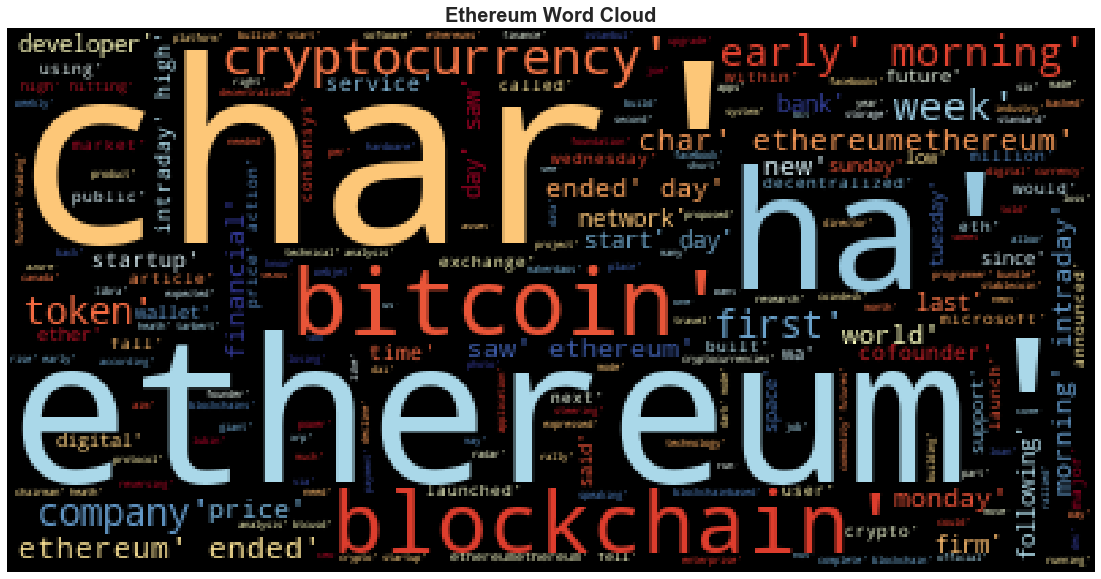

In [54]:
# Generate the Ethereum word cloud

big_string_ethereum=str(ethereum_en_df["tokens"].tolist())


wordcloud = WordCloud(colormap="RdYlBu").generate(big_string_ethereum)
fig_bow_cloud = plt.figure()
plot_bow_cloud = plt.imshow(wordcloud)
plot_bow_cloud = plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plot_bow_cloud = plt.title("Ethereum Word Cloud", fontdict=fontdict)
plot_bow_cloud = plt.show()
plt.close(fig_bow_cloud)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [55]:
import spacy
from spacy import displacy

In [56]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [57]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [58]:
# Concatenate all of the bitcoin text together

bitcoin_text= " ".join(bitcoin_en_df.text.to_list())
print(bitcoin_text)

Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars] At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars] High school students in France may be among the first people in the world to actually understand how cryptocurrency works. 
The Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars] TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.
When it comes to Bitcoin, you get the gist: Cryptocurren

In [31]:
# Run the NER processor on all of the text

# Add a title to the document

In [32]:
# Render the visualization

In [33]:
# List all Entities

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text

# Add a title to the document

In [36]:
# Render the visualization

In [37]:
# List all Entities

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f